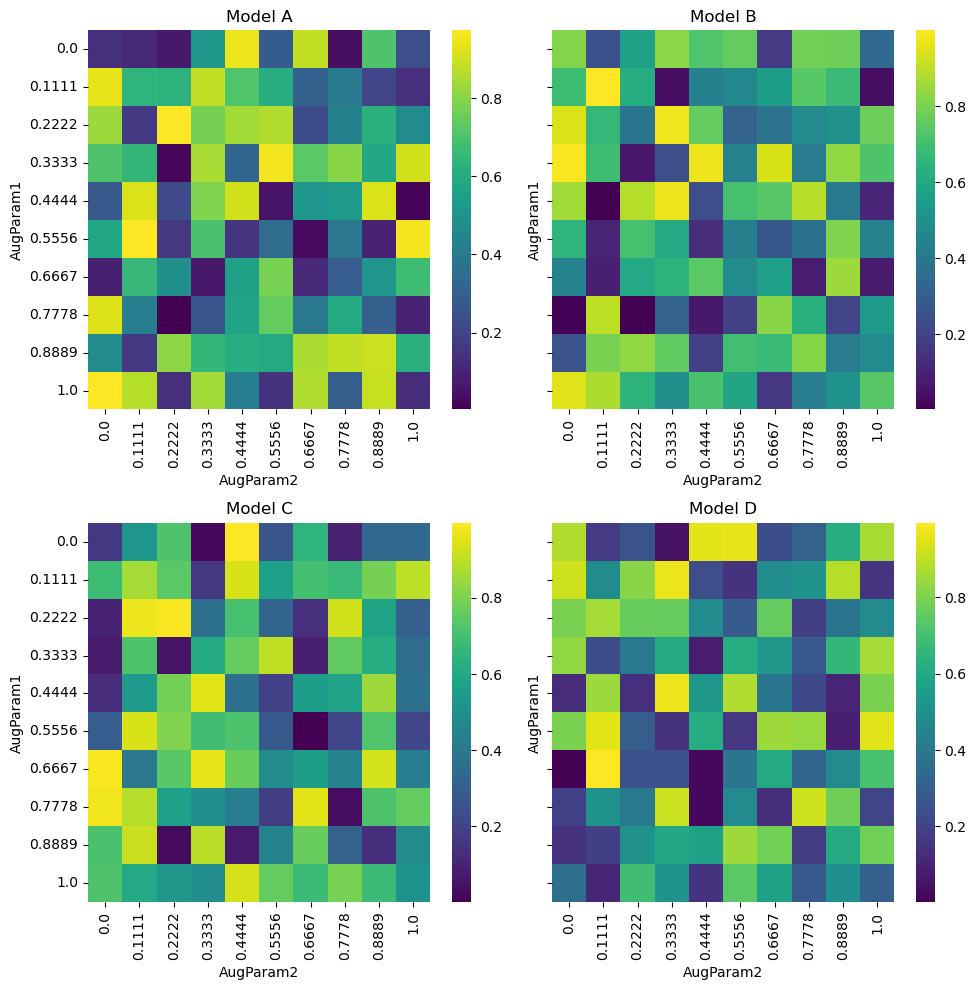

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data generation
# Assume augmentation parameters vary from 0 to 1 with 10 steps
aug_param1 = np.linspace(0, 1, 10)
aug_param2 = np.linspace(0, 1, 10)
models = ['Model A', 'Model B', 'Model C', 'Model D']

# Create a grid of augmentation parameters
param_grid = np.array(np.meshgrid(aug_param1, aug_param2)).T.reshape(-1, 2)

# Simulate metric values for each model
metric_data = {}
for model in models:
    # Simulate metric values (replace this with your actual metric computation)
    metric_values = np.random.rand(len(param_grid))
    metric_data[model] = metric_values

# Prepare the data for heatmap plotting
df_list = []
for model in models:
    df = pd.DataFrame(param_grid, columns=['AugParam1', 'AugParam2'])
    df['Metric'] = metric_data[model]
    df['Model'] = model
    df_list.append(df)
full_df = pd.concat(df_list)

# Round augmentation parameters to avoid floating-point precision issues
full_df['AugParam1'] = full_df['AugParam1'].round(4)
full_df['AugParam2'] = full_df['AugParam2'].round(4)

# Pivot the data for heatmap
heatmap_data = {}
for model in models:
    model_df = full_df[full_df['Model'] == model]
    pivot_table = model_df.pivot(index='AugParam1', columns='AugParam2', values='Metric')
    heatmap_data[model] = pivot_table

# Plotting heatmaps
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharey=True)
axes = axes.ravel()
for idx, model in enumerate(models):
    ax = axes[idx]
    sns.heatmap(heatmap_data[model], ax=ax, cmap='viridis')
    ax.set_title(model)
    ax.set_xlabel('AugParam2')
    ax.set_ylabel('AugParam1')
plt.tight_layout()
plt.show()


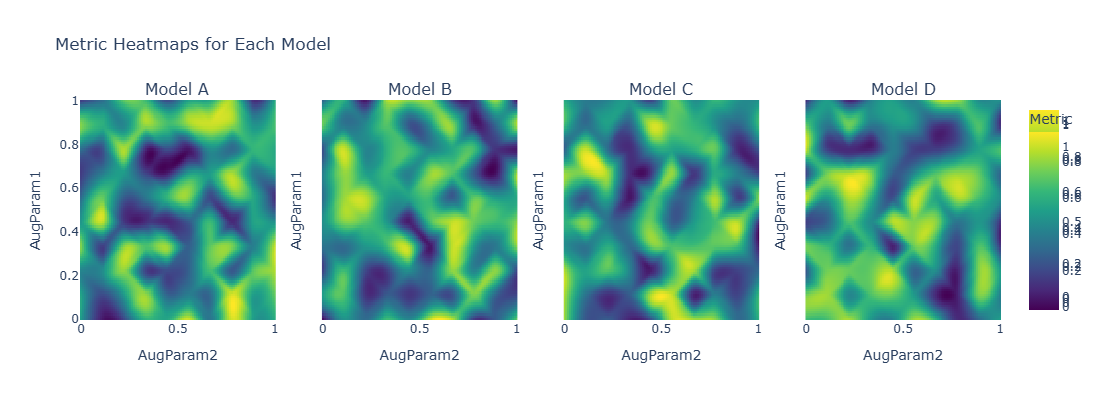

In [16]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.subplots as sp
from scipy.interpolate import griddata

# Sample data generation
# Assume augmentation parameters vary from 0 to 1 with 10 steps
aug_param1 = np.linspace(0, 1, 10)
aug_param2 = np.linspace(0, 1, 10)
models = ['Model A', 'Model B', 'Model C', 'Model D']

# Create a grid of augmentation parameters
param_grid = np.array(np.meshgrid(aug_param1, aug_param2)).T.reshape(-1, 2)

# Simulate metric values for each model
metric_data = {}
for model in models:
    # Simulate metric values (replace this with your actual metric computation)
    metric_values = np.random.rand(len(param_grid))
    metric_data[model] = metric_values

# Prepare the data for plotting
df_list = []
for model in models:
    df = pd.DataFrame(param_grid, columns=['AugParam1', 'AugParam2'])
    df['Metric'] = metric_data[model]
    df['Model'] = model
    df_list.append(df)
full_df = pd.concat(df_list)

# Round augmentation parameters to avoid floating-point precision issues
full_df['AugParam1'] = full_df['AugParam1'].round(4)
full_df['AugParam2'] = full_df['AugParam2'].round(4)

# Create smoother grids for interpolation
aug_param1_fine = np.linspace(0, 1, 100)
aug_param2_fine = np.linspace(0, 1, 100)
param_grid_fine = np.meshgrid(aug_param1_fine, aug_param2_fine)

# Initialize Plotly subplots
fig = sp.make_subplots(rows=1, cols=len(models), subplot_titles=models, shared_yaxes=True)

# Loop through each model to create heatmaps
for idx, model in enumerate(models):
    model_df = full_df[full_df['Model'] == model]
    # Interpolate the data to create a smooth heatmap
    points = model_df[['AugParam1', 'AugParam2']].values
    values = model_df['Metric'].values
    grid_z = griddata(points, values, (param_grid_fine[0], param_grid_fine[1]), method='cubic')

    # Flip the y-axis by reversing the order of y-values
    fig.add_trace(
        go.Heatmap(
            x=aug_param2_fine,
            y=aug_param1_fine[::-1],  # Reverse y-axis
            z=grid_z[::-1],           # Flip the data accordingly
            colorscale='Viridis',
            colorbar=dict(title='Metric') if idx == len(models)-1 else None,
        ),
        row=1, col=idx+1
    )
    fig.update_xaxes(title_text='AugParam2', row=1, col=idx+1)
    fig.update_yaxes(title_text='AugParam1', row=1, col=idx+1)

# Adjust layout
fig.update_layout(height=400, width=1000, title_text="Metric Heatmaps for Each Model", showlegend=False)
fig.show()


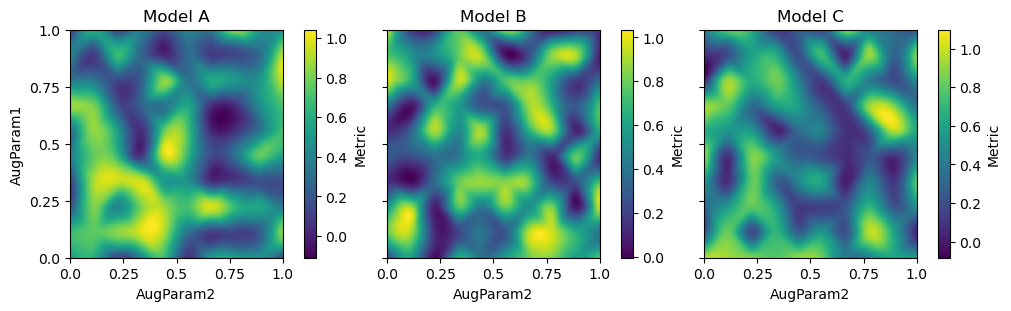

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
from scipy.ndimage import gaussian_filter

# Sample data generation
aug_param1 = np.linspace(0, 1, 10)
aug_param2 = np.linspace(0, 1, 10)
models = ['Model A', 'Model B', 'Model C']

param_grid = np.array(np.meshgrid(aug_param1, aug_param2)).T.reshape(-1, 2)

metric_data = {}
for model in models:
    metric_values = np.random.rand(len(param_grid))
    metric_data[model] = metric_values

df_list = []
for model in models:
    df = pd.DataFrame(param_grid, columns=['AugParam1', 'AugParam2'])
    df['Metric'] = metric_data[model]
    df['Model'] = model
    df_list.append(df)
full_df = pd.concat(df_list)

full_df['AugParam1'] = full_df['AugParam1'].round(4)
full_df['AugParam2'] = full_df['AugParam2'].round(4)

# Create finer grids for interpolation
aug_param1_fine = np.linspace(0, 1, 100)
aug_param2_fine = np.linspace(0, 1, 100)
param_grid_fine = np.meshgrid(aug_param2_fine, aug_param1_fine)

# Initialize the figure with constrained layout
fig, axes = plt.subplots(1, len(models), figsize=(10, 3), sharey=True, constrained_layout=True)

# Loop through each model to create heatmaps
for idx, model in enumerate(models):
    model_df = full_df[full_df['Model'] == model]
    # Interpolate the data
    points = model_df[['AugParam2', 'AugParam1']].values  # x, y order for plotting
    values = model_df['Metric'].values
    grid_z = griddata(points, values, (param_grid_fine[0], param_grid_fine[1]), method='cubic')

    # Handle NaN values resulting from interpolation
    grid_z = np.nan_to_num(grid_z, nan=np.nanmin(grid_z))

    # Apply Gaussian filter to smooth the heatmap
    grid_z = gaussian_filter(grid_z, sigma=1)

    ax = axes[idx]
    # Display the heatmap using imshow
    im = ax.imshow(
        grid_z,
        cmap='viridis',
        extent=(0, 1, 0, 1),
        origin='lower',
        aspect='auto'
    )

    # Add colorbar to each subplot
    cbar = plt.colorbar(im, ax=ax)
    cbar.ax.set_ylabel('Metric')

    ax.set_title(model)
    ax.set_xlabel('AugParam2')
    if idx == 0:
        ax.set_ylabel('AugParam1')
    else:
        ax.set_ylabel('')

    # Invert y-axis
#     ax.invert_yaxis()

    # Set x and y ticks
    x_ticks = np.linspace(0, 1, 5)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(np.round(x_ticks, 2))

    y_ticks = np.linspace(0, 1, 5)
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(np.round(y_ticks, 2))

plt.show()
